In [6]:
from IPython.display import Image,display # to display graph
from langgraph.graph import StateGraph,START # create state machine
from langchain_openai import ChatOpenAI
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict): # state is a memeory all users details save
    messages: Annotated[list, add_messages] #chat bot memory

In [8]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun() # this is a web search tool
search.invoke("Obama's first name?")

"The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ... The Irish Sun, It's a fake Barack Obama's brother posts forged document he claims is ex-president's 'Kenyan birth certificate,' March 11, 2017 Salon, Orly Taitz is at it again , Sept. 4, 2009 As the head of the government of the United States, the president is arguably the most powerful government official in the world. The president is elected to a four-year term via an electoral college system. Since the Twenty-second Amendment was adopted in 1951, the American presidency has been limited to a maximum of two terms.. Click on a president below to learn more about each presidency ... Born on 

In [9]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

# Example usage
result = search_duckduckgo("what are AI agent")
print(result)

AI agents use feedback mechanisms, such as other AI agents and human-in-the-loop (HITL), to improve the accuracy of their responses. Let's return to our previous surfing example to highlight this. After the agent forms its response to the user, the agent stores the learned information along with the user's feedback to improve performance ... Limitations of AI Agents. AI agents have undoubtedly transformed many industries, but they come with limitations that impact their reliability, adaptability, and ethical use. Here are some of the main limitations: Limited Understanding of Context Many AI agents lack the deep understanding of context that humans have. But artificial intelligence may soon transcend that divide now that technology companies are building AI "agents"—systems able to make decisions and achieve goals with minimal human oversight. AI agents are also difficult to evaluate in a repeatable way that shows progress without employing artificial constraints. This is especially ch

In [10]:
def multiply(a:int,b:int) -> int: # create own tools, own tools mean simply create a function
    """
    Multiply a and b
    """
    return a* b

def add(a:int,b:int) -> int: # second tool
    """
    Adds a and b
    """
    return a + b



In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", temperature=0.1, api_key="Your google API key")

In [12]:
llm.invoke('hello').content

'Hello there! How can I help you today?'

In [13]:
tools = [search_duckduckgo, add, multiply] # binding all tools

llm_with_tools = llm.bind_tools(tools) 

In [14]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # here state is memeory


In [15]:
from langgraph.prebuilt import ToolNode, tools_condition # create state graph

graph_builder = StateGraph(State)

# Define nodes and add nodes
graph_builder.add_node("assistant",chatbot) # chat node
graph_builder.add_node("tools",ToolNode(tools)) # tool node

#define edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

react_graph=graph_builder.compile() # compile to run it 

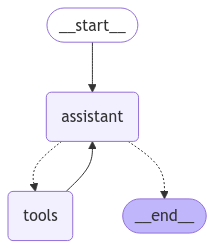

In [16]:
# To see the graph’s connection visually

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [17]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in delhi. Extract temperature value. Multiply it by 2 and add 5.")]})
print(response["messages"]) # first dudckduck tool to find whter in delhi after use multiply finction tool to do multiply and after additon tool fnction to do additon

[HumanMessage(content='what is the weather in delhi. Extract temperature value. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='6b732ccc-2eaa-4149-b9ae-af72d9fd6736'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_duckduckgo', 'arguments': '{"query": "weather in delhi"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-3123bd2d-2ae2-4c24-b6f5-a62b0870958a-0', tool_calls=[{'name': 'search_duckduckgo', 'args': {'query': 'weather in delhi'}, 'id': '9402b4e3-5762-4343-86e6-7b7db0493ac6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 63, 'output_tokens': 9, 'total_tokens': 72, 'input_token_details': {'cache_read': 0}}), ToolMessage(content="Get today's real-time weather updates in New Delhi with hourly temperatures and a weekly forecast. Find out about New Delhi's temperature trends, rain chances, air quality (AQI), and humidity ... N

In [18]:
for m in response['messages']:
    m.pretty_print() # when change llm it can extract text and do numerical work 

================================ Human Message =================================

what is the weather in delhi. Extract temperature value. Multiply it by 2 and add 5.
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (9402b4e3-5762-4343-86e6-7b7db0493ac6)
 Call ID: 9402b4e3-5762-4343-86e6-7b7db0493ac6
  Args:
    query: weather in delhi
================================= Tool Message =================================
Name: search_duckduckgo

Get today's real-time weather updates in New Delhi with hourly temperatures and a weekly forecast. Find out about New Delhi's temperature trends, rain chances, air quality (AQI), and humidity ... New Delhi Weather Forecasts. Weather Underground provides local & long-range weather forecasts, weatherreports, maps & tropical weather conditions for the New Delhi area. Our 5-day meteogram for New Delhi offers all weather information in 3 simple graphs: [More] Temperature chart with weather pi